<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Time_use_shares_with_vaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Feb 23 04:32:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from tensorflow.keras import backend as K   # Use tensorflow.keras
K.clear_session()

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow import set_random_seed

from numpy.random import seed

import numpy as np

In [0]:
epochs = 500
batch_size = 128   

In [5]:
import pandas as pd 
df=pd.read_csv("https://github.com/yaniv256/VAEs-in-Economics/blob/master/Data/Timeuse/time_shares_only_2013.csv?raw=true")
df

,Sleeping,Television_and_movies__not_religious_,Work__main_job,Eating_and_drinking,Socializing_and_communicating_with_others,Washing__dressing_and_grooming_oneself,Food_and_drink_preparation_,Interior_cleaning,Reading_for_personal_interest,Relaxing__thinking_,Shopping__except_groceries__food_and_gas,Travel_related_to_working,Playing_games,Laundry,Computer_use_for_leisure__exc__Games_,Lawn__garden__and_houseplant_care,Insufficient_detail_in_verbatim,Physical_care_for_hh_children,Attending_religious_services,Playing_with_hh_children__not_sports,Kitchen_and_food_clean_up,Grocery_shopping,Travel_related_to_eating_and_drinking,Research_homework_for_class_for_degree__certification__or_licensure,Travel_related_to_shopping__ex_groceries__food__and_gas,Household___personal_organization_and_planning,Taking_class_for_degree__certification__or_licensure,Travel_related_to_socializing_and_communicating,Health_related_self_care,Attending_or_hosting_parties_receptions_ceremonies,Work__other_job_s_,Gap_can_t_remember,Travel_related_to_caring_for___helping_hh_children,Sleeplessness,Travel_related_to_grocery_shopping,Walking,Care_for_animals_and_pets__not_veterinary_care_,Walking___exercising___playing_with_animals,Participation_in_religious_practices,Interior_arrangement__decoration____repairs,...,Travel_rel__to_socializing__relaxing____leisure__n_e_c__,Waiting_associated_w_banking_financial_services,Waiting_associated_w_admin__activities__education_,Travel_related_to_using_lawn_and_garden_services,Travel_related_to_nonhh_children_s_education,Waiting_associated_with_work_related_activities,Using_interior_cleaning_services_,Waiting_assoc__w_attending_hosting_social_events,Watching_rugby,Watching_skiing__ice_skating__snowboarding,Travel_related_to_personal_care__n_e_c__,Travel_related_to_education__n_e_c__,Travel_related_to_using_household_services__n_e_c__,Travel_related_to_work__n_e_c__,Travel_rel__to_religious_spiritual_activities__n_e_c__,Waiting_associated_w_purchasing_selling_real_estate,Waiting_associated_with_socializing__n_e_c__,Travel_related_to_consumer_purchases__n_e_c__,Security_procedures_related_to_work,Using_pet_services__n_e_c__,Telephone_calls_to_from_paid_child_or_adult_care_providers,Travel_related_to_using_legal_services,Lawn_and_garden__n_e_c___,Waiting_associated_with_research_homework,Waiting_associated_with_pet_services,Waiting_associated_with_other_income_generating_activities,Using_vehicle_maint____repair_svcs__n_e_c__,Housework__n_e_c___,Using_lawn_and_garden_services__n_e_c__,Security_procedures_rel__to_govt_svcs_civic_obligations__n_e_c__,Activities_related_to_nonhh_child_s_educ___n_e_c__,Waiting_associated_with_job_search_or_interview,Work_and_work_related_activities__n_e_c__,Government_services__n_e_c__,Public_health___safety_activities__n_e_c__,Travel_related_to_household_activities__n_e_c__,Travel_rel__to_govt_svcs___civic_obligations__n_e_c__,Food___drink_prep__presentation____clean_up__n_e_c___,Telephone_calls__n_e_c__,Public_health_activities
0,540,330,0,35,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,580,95,0,75,0,35,60,25,15,0,0,0,0,0,50,0,0,80,0,309,20,60,0,0,0,5,0,0,0,0,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,450,60,0,170,0,90,105,0,20,0,0,0,0,0,0,0,0,0,0,0,15,15,0,0,0,0,0,0,0,0,0,0,0,0,40,0,145,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,450,65,680,70,0,30,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,570,90,0,120,0,0,60,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
qt = pd.DataFrame(qt_trans.fit_transform(df))
qt.columns = df.columns
qt

,Sleeping,Television_and_movies__not_religious_,Work__main_job,Eating_and_drinking,Socializing_and_communicating_with_others,Washing__dressing_and_grooming_oneself,Food_and_drink_preparation_,Interior_cleaning,Reading_for_personal_interest,Relaxing__thinking_,Shopping__except_groceries__food_and_gas,Travel_related_to_working,Playing_games,Laundry,Computer_use_for_leisure__exc__Games_,Lawn__garden__and_houseplant_care,Insufficient_detail_in_verbatim,Physical_care_for_hh_children,Attending_religious_services,Playing_with_hh_children__not_sports,Kitchen_and_food_clean_up,Grocery_shopping,Travel_related_to_eating_and_drinking,Research_homework_for_class_for_degree__certification__or_licensure,Travel_related_to_shopping__ex_groceries__food__and_gas,Household___personal_organization_and_planning,Taking_class_for_degree__certification__or_licensure,Travel_related_to_socializing_and_communicating,Health_related_self_care,Attending_or_hosting_parties_receptions_ceremonies,Work__other_job_s_,Gap_can_t_remember,Travel_related_to_caring_for___helping_hh_children,Sleeplessness,Travel_related_to_grocery_shopping,Walking,Care_for_animals_and_pets__not_veterinary_care_,Walking___exercising___playing_with_animals,Participation_in_religious_practices,Interior_arrangement__decoration____repairs,...,Travel_rel__to_socializing__relaxing____leisure__n_e_c__,Waiting_associated_w_banking_financial_services,Waiting_associated_w_admin__activities__education_,Travel_related_to_using_lawn_and_garden_services,Travel_related_to_nonhh_children_s_education,Waiting_associated_with_work_related_activities,Using_interior_cleaning_services_,Waiting_assoc__w_attending_hosting_social_events,Watching_rugby,Watching_skiing__ice_skating__snowboarding,Travel_related_to_personal_care__n_e_c__,Travel_related_to_education__n_e_c__,Travel_related_to_using_household_services__n_e_c__,Travel_related_to_work__n_e_c__,Travel_rel__to_religious_spiritual_activities__n_e_c__,Waiting_associated_w_purchasing_selling_real_estate,Waiting_associated_with_socializing__n_e_c__,Travel_related_to_consumer_purchases__n_e_c__,Security_procedures_related_to_work,Using_pet_services__n_e_c__,Telephone_calls_to_from_paid_child_or_adult_care_providers,Travel_related_to_using_legal_services,Lawn_and_garden__n_e_c___,Waiting_associated_with_research_homework,Waiting_associated_with_pet_services,Waiting_associated_with_other_income_generating_activities,Using_vehicle_maint____repair_svcs__n_e_c__,Housework__n_e_c___,Using_lawn_and_garden_services__n_e_c__,Security_procedures_rel__to_govt_svcs_civic_obligations__n_e_c__,Activities_related_to_nonhh_child_s_educ___n_e_c__,Waiting_associated_with_job_search_or_interview,Work_and_work_related_activities__n_e_c__,Government_services__n_e_c__,Public_health___safety_activities__n_e_c__,Travel_related_to_household_activities__n_e_c__,Travel_rel__to_govt_svcs___civic_obligations__n_e_c__,Food___drink_prep__presentation____clean_up__n_e_c___,Telephone_calls__n_e_c__,Public_health_activities
0,0.571572,0.831832,0.000000,0.304805,0.000000,0.311311,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.997387,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.693193,0.400901,0.000000,0.646146,0.000000,0.508008,0.825325,0.782282,0.791792,0.000000,0.0,0.000000,0.000000,0.000000,0.919920,0.0,0.000000,0.961962,0.0,0.995862,0.851852,0.958458,0.000000,0.000000,0.0,0.871371,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.877878,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.262262,0.304304,0.000000,0.958959,0.000000,0.903403,0.937437,0.000000,

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(qt, test_size=0.33, random_state=42)
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [8]:
!rm -f vaes_net.py
!wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"


--2020-02-23 04:33:00--  https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10495 (10K) [text/plain]
Saving to: ‘vaes_net.py’

vaes_net.py         100%[===================>]  10.25K  --.-KB/s    in 0s      

2020-02-23 04:33:00 (172 MB/s) - ‘vaes_net.py’ saved [10495/10495]



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 390)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 389)]        0           input_1[0][0]                    
__________________________________________________________________________________________________
gaussian_noise (GaussianNoise)  (None, 389)          0           tf_op_layer_strided_slice_1[0][0]
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         400384      gaussian_noise[0][0]             
____

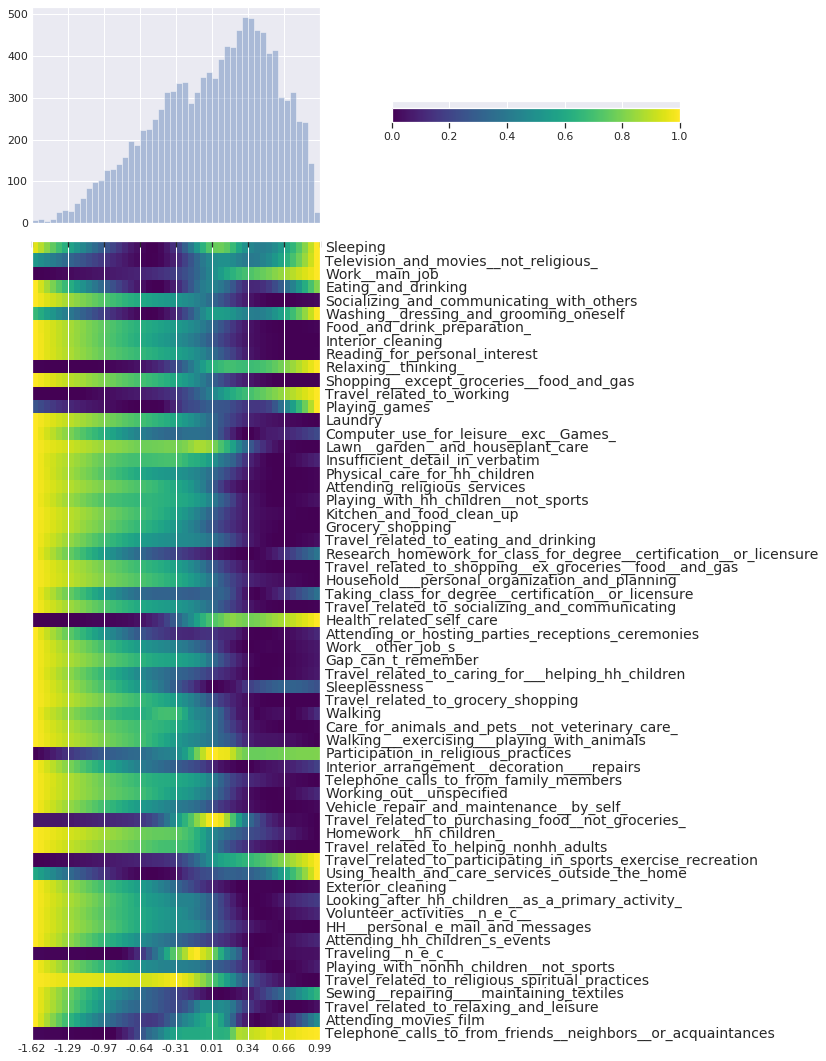

7627/7627 [==============================] - 4s 478us/sample - loss: 0.0168 - val_loss: 0.0152
Epoch 2/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0157 - val_loss: 0.0148
Epoch 3/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0155 - val_loss: 0.0147
Epoch 4/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0154 - val_loss: 0.0145
Epoch 5/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0153 - val_loss: 0.0144
Epoch 6/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0152 - val_loss: 0.0143
Epoch 7/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0151 - val_loss: 0.0142
Epoch 8/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0151 - val_loss: 0.0142
Epoch 9/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0151 - val_loss: 0.0142
Epoch 10/500
7627/7627 [==============================] -

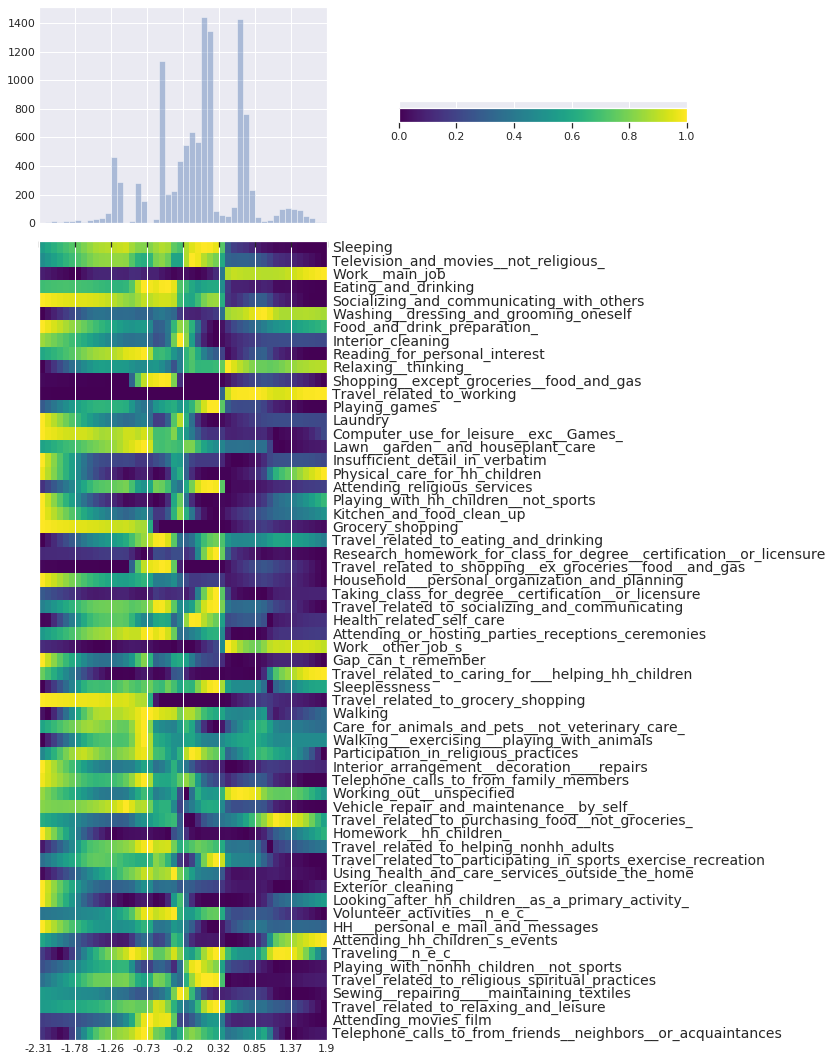

7627/7627 [==============================] - 3s 335us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 102/500
7627/7627 [==============================] - 0s 55us/sample - loss: 0.0145 - val_loss: 0.0133
Epoch 103/500
7627/7627 [==============================] - 0s 54us/sample - loss: 0.0145 - val_loss: 0.0133
Epoch 104/500
7627/7627 [==============================] - 0s 54us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 105/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 106/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 107/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 108/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 109/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 110/500
7627/7627 [================

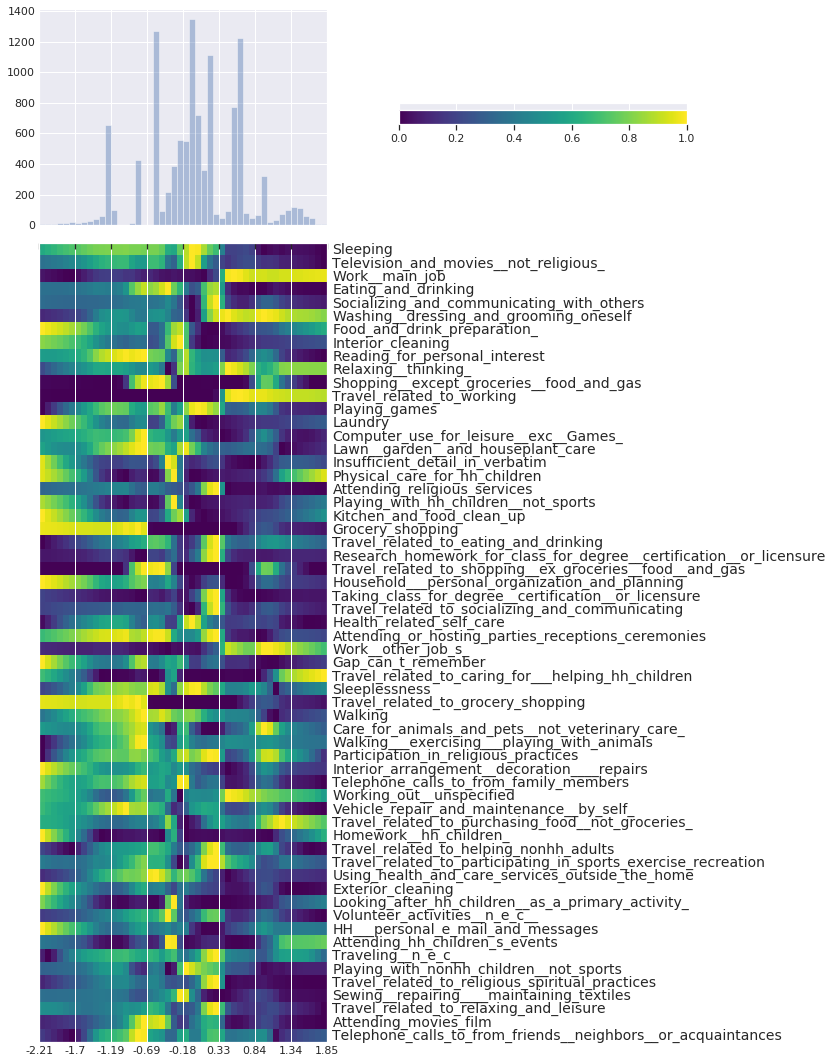

7627/7627 [==============================] - 3s 331us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 202/500
7627/7627 [==============================] - 0s 51us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 203/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 204/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 205/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 206/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0143 - val_loss: 0.0130
Epoch 207/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 208/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 209/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 210/500
7627/7627 [================

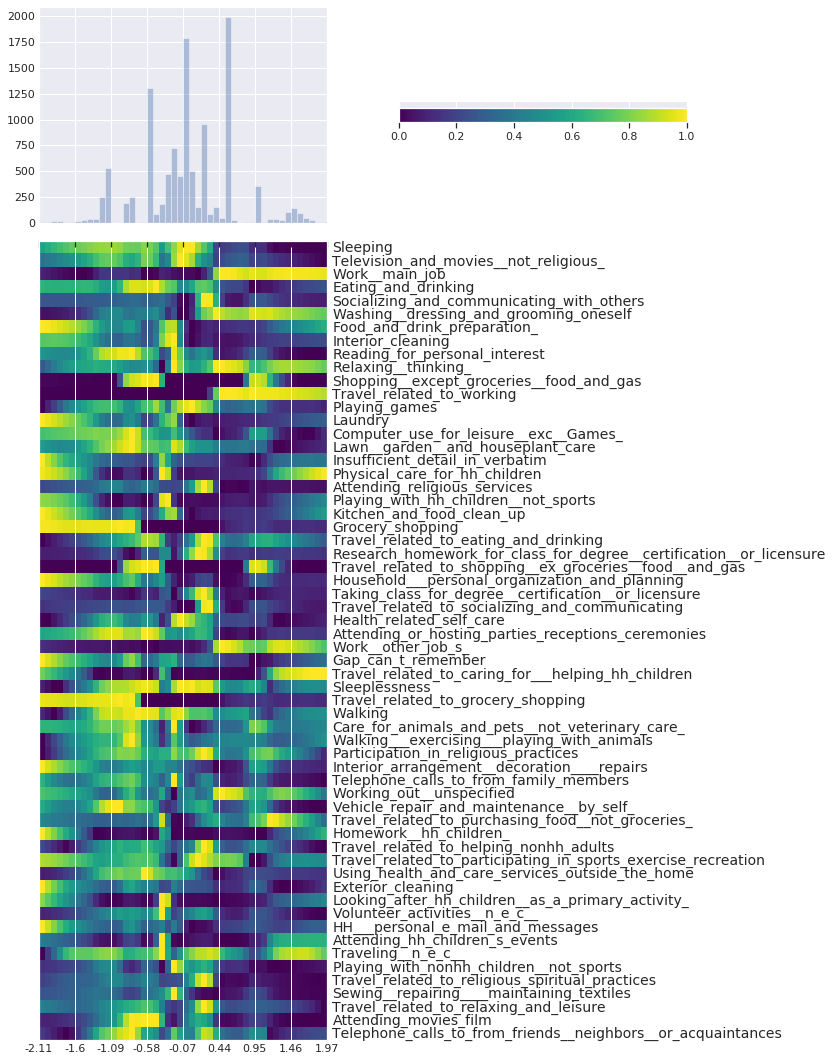

7627/7627 [==============================] - 3s 350us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 302/500
7627/7627 [==============================] - 0s 52us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 303/500
7627/7627 [==============================] - 0s 48us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 304/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 305/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 306/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 307/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 308/500
7627/7627 [==============================] - 0s 50us/sample - loss: 0.0141 - val_loss: 0.0130
Epoch 309/500
7627/7627 [==============================] - 0s 51us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 310/500
7627/7627 [================

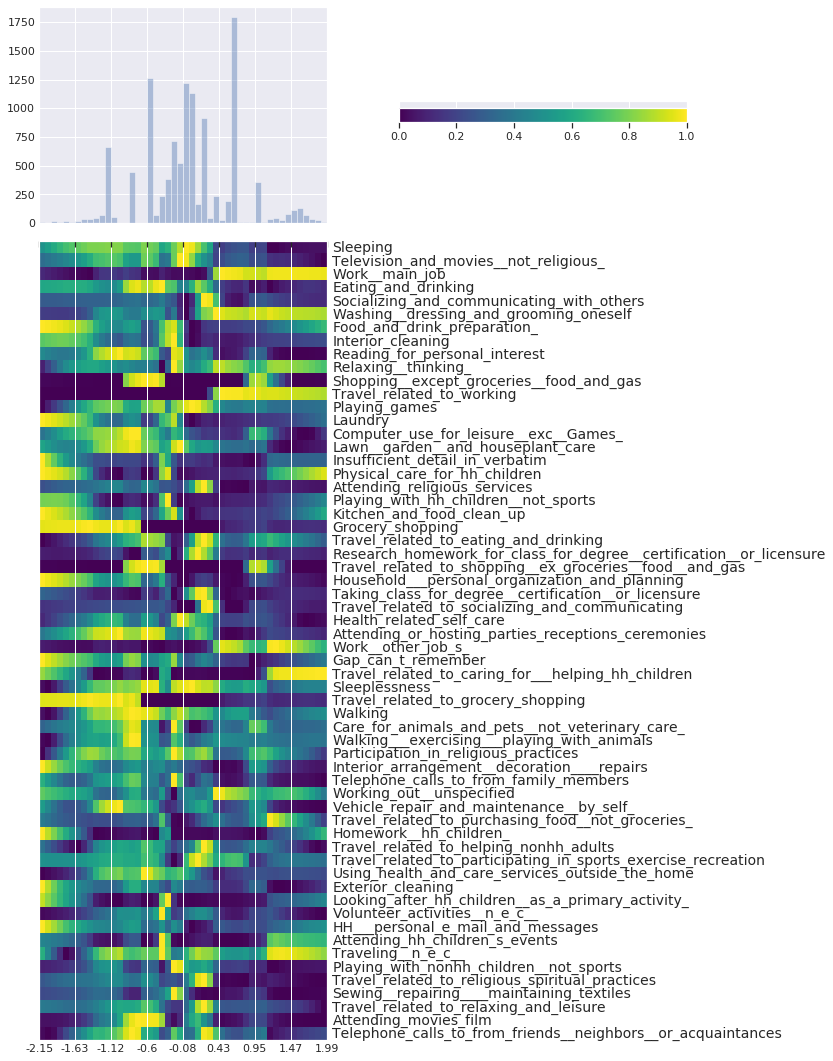

7627/7627 [==============================] - 3s 338us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 402/500
7627/7627 [==============================] - 0s 53us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 403/500
7627/7627 [==============================] - 0s 51us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 404/500
6528/7627 [========================>.....] - ETA: 0s - loss: 0.0141
Epoch 00404: ReduceLROnPlateau reducing learning rate to 0.0003486784757114947.
7627/7627 [==============================] - 0s 53us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 405/500
7627/7627 [==============================] - 0s 52us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 406/500
7627/7627 [==============================] - 0s 51us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 407/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0143 - val_loss: 0.0129
Epoch 408/500
7627/7627 [==============================] - 0s 49us/sample - loss: 0.0141 - val_loss: 0.0129
E

In [9]:
from vaes_net import make_vae, callback_list, plot_types
seed(42)
set_random_seed(42)
vae = make_vae(qt)  
vae.summary()

fitted = vae.fit(
    x=x_train, 
    y=None,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, None),
    callbacks = callback_list
    )

In [10]:
vae

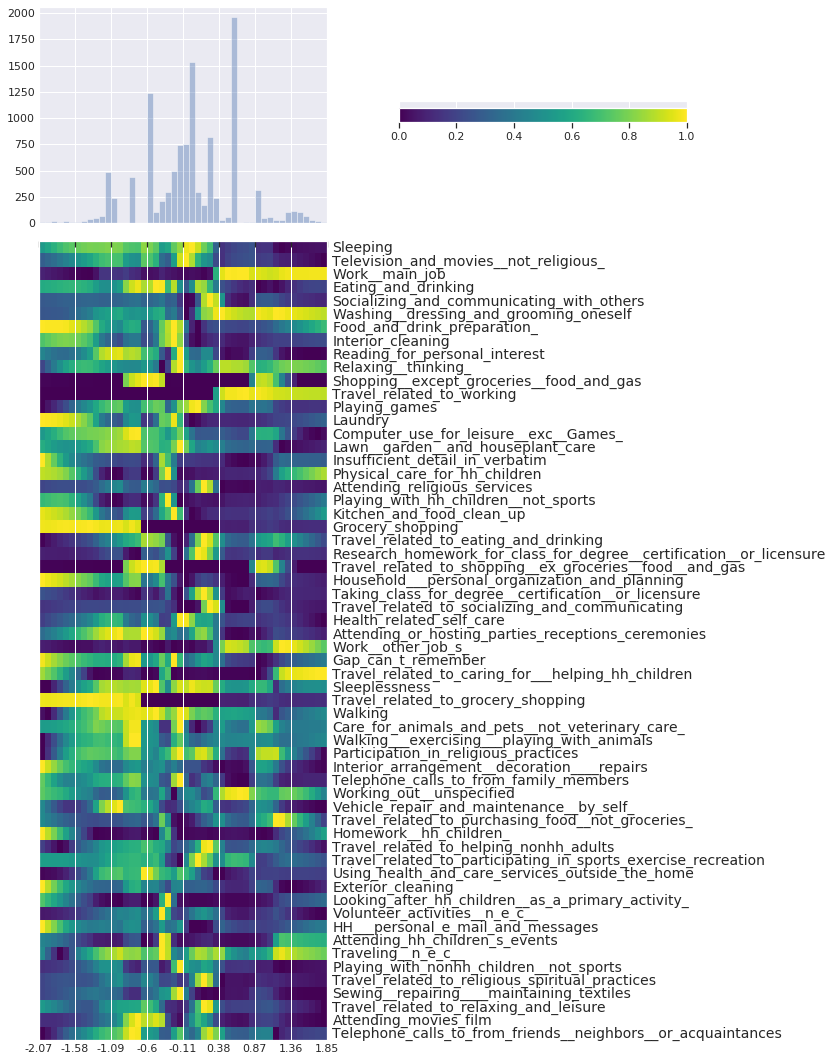

In [11]:
plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt, n_activity=60, n_type= 48, scaler = True, spacing=-0.035);

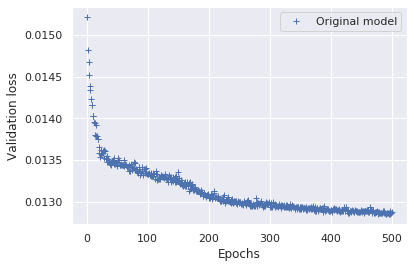

In [12]:
epochs_grid = range(1, epochs+1)
val_loss1 = fitted.history['val_loss']
#val_loss2 = fitted2.history['val_loss']


import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs_grid, val_loss1, 'b+', label='Original model')
# "bo" is for "blue dot"
#plt.plot(epochs_grid, val_loss2, 'bo', label='Alternative model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

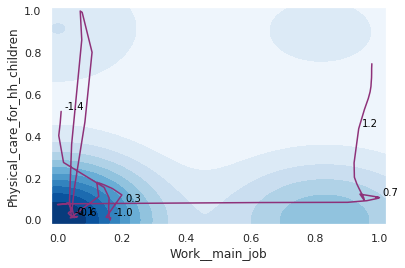

In [13]:
from vaes_net import encode_plot2d
  
encode_plot2d(encoder=vae.encoder,decoder=vae.decoder, 
              data=vae.full_data)

In [14]:

flag_1 = np.ones((qt.shape[0],1),dtype=qt.values.dtype)
data = np.concatenate((qt.values,flag_1),axis=-1)
encoded_data=vae.encoder.predict(data)
pd.DataFrame(encoded_data)

,0
0,0.005547
1,-1.379974
2,-1.118582
3,0.576908
4,-0.064614
...,...
11380,-0.054438
11381,0.544864
11382,0.555994
11383,0.060412


In [15]:
from sklearn.preprocessing import MinMaxScaler

filtered=pd.DataFrame((vae.decoder.predict(encoded_data)))
scaler = MinMaxScaler()
filtered=pd.DataFrame(scaler.fit_transform(filtered))  
filtered.columns = df.columns
filtered

,Sleeping,Television_and_movies__not_religious_,Work__main_job,Eating_and_drinking,Socializing_and_communicating_with_others,Washing__dressing_and_grooming_oneself,Food_and_drink_preparation_,Interior_cleaning,Reading_for_personal_interest,Relaxing__thinking_,Shopping__except_groceries__food_and_gas,Travel_related_to_working,Playing_games,Laundry,Computer_use_for_leisure__exc__Games_,Lawn__garden__and_houseplant_care,Insufficient_detail_in_verbatim,Physical_care_for_hh_children,Attending_religious_services,Playing_with_hh_children__not_sports,Kitchen_and_food_clean_up,Grocery_shopping,Travel_related_to_eating_and_drinking,Research_homework_for_class_for_degree__certification__or_licensure,Travel_related_to_shopping__ex_groceries__food__and_gas,Household___personal_organization_and_planning,Taking_class_for_degree__certification__or_licensure,Travel_related_to_socializing_and_communicating,Health_related_self_care,Attending_or_hosting_parties_receptions_ceremonies,Work__other_job_s_,Gap_can_t_remember,Travel_related_to_caring_for___helping_hh_children,Sleeplessness,Travel_related_to_grocery_shopping,Walking,Care_for_animals_and_pets__not_veterinary_care_,Walking___exercising___playing_with_animals,Participation_in_religious_practices,Interior_arrangement__decoration____repairs,...,Travel_rel__to_socializing__relaxing____leisure__n_e_c__,Waiting_associated_w_banking_financial_services,Waiting_associated_w_admin__activities__education_,Travel_related_to_using_lawn_and_garden_services,Travel_related_to_nonhh_children_s_education,Waiting_associated_with_work_related_activities,Using_interior_cleaning_services_,Waiting_assoc__w_attending_hosting_social_events,Watching_rugby,Watching_skiing__ice_skating__snowboarding,Travel_related_to_personal_care__n_e_c__,Travel_related_to_education__n_e_c__,Travel_related_to_using_household_services__n_e_c__,Travel_related_to_work__n_e_c__,Travel_rel__to_religious_spiritual_activities__n_e_c__,Waiting_associated_w_purchasing_selling_real_estate,Waiting_associated_with_socializing__n_e_c__,Travel_related_to_consumer_purchases__n_e_c__,Security_procedures_related_to_work,Using_pet_services__n_e_c__,Telephone_calls_to_from_paid_child_or_adult_care_providers,Travel_related_to_using_legal_services,Lawn_and_garden__n_e_c___,Waiting_associated_with_research_homework,Waiting_associated_with_pet_services,Waiting_associated_with_other_income_generating_activities,Using_vehicle_maint____repair_svcs__n_e_c__,Housework__n_e_c___,Using_lawn_and_garden_services__n_e_c__,Security_procedures_rel__to_govt_svcs_civic_obligations__n_e_c__,Activities_related_to_nonhh_child_s_educ___n_e_c__,Waiting_associated_with_job_search_or_interview,Work_and_work_related_activities__n_e_c__,Government_services__n_e_c__,Public_health___safety_activities__n_e_c__,Travel_related_to_household_activities__n_e_c__,Travel_rel__to_govt_svcs___civic_obligations__n_e_c__,Food___drink_prep__presentation____clean_up__n_e_c___,Telephone_calls__n_e_c__,Public_health_activities
0,0.993584,0.884733,0.054411,0.432049,0.023262,0.134437,0.106554,0.050331,0.331757,0.714431,0.004101,0.002772,0.973068,0.004316,0.241866,0.545865,0.080222,0.040720,0.366520,0.049733,0.005330,0.002057,0.470229,0.689987,0.003368,0.144313,0.562352,0.006219,0.810623,0.605004,0.047538,0.266446,0.023885,0.970464,0.001455,0.778884,0.116686,0.348544,0.786412,0.137698,...,0.123655,0.005857,0.062438,0.108236,0.183827,0.004431,0.035874,0.022466,0.056864,0.0,0.045124,0.113784,0.030854,0.027289,0.085883,0.013165,0.083139,0.003131,0.014495,0.011092,0.027323,0.0,0.077431,0.007711,0.035806,0.0,0.008224,0.065787,0.099808,0.063671,0.038412,0.112065,0.017299,0.0,0.0,0.0,0.0,0.018960,0.074472,0.205721
1,0.790387,0.624841,0.017101,0.564829,0.340390,0.416590,0.784288,0.695465,0.517148,0.799202,0.005113,0.001906,0.607732,0.746126,0.486444,0.555231,0.161624,0.416567,0.257589,0.401417,0.542407,0.999226,0.391592,0.129333,0.004379,0.648106,0.091484,0.218839,0.450268,0.798662,0.074870,0.446921,0.054

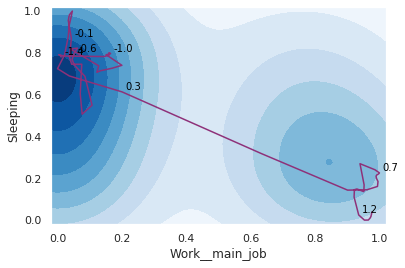

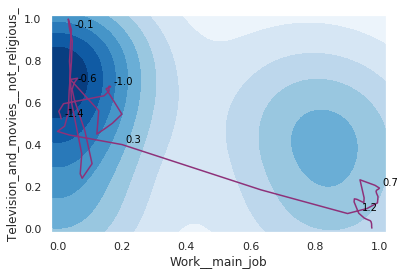

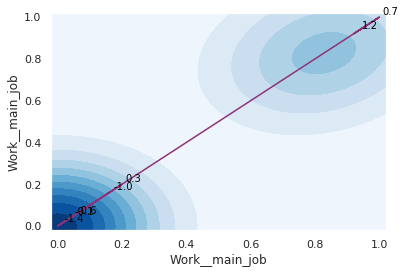

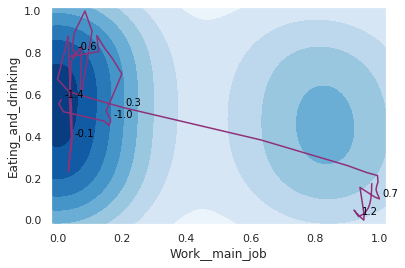

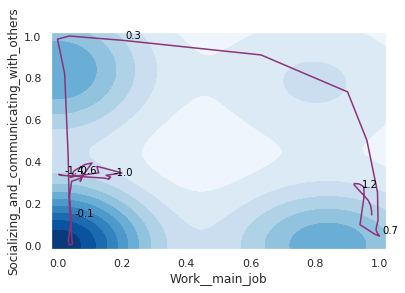

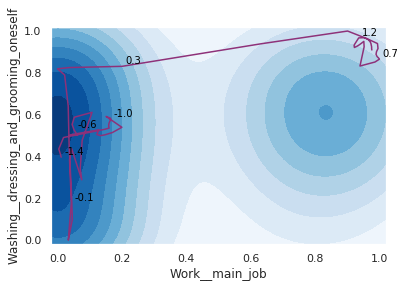

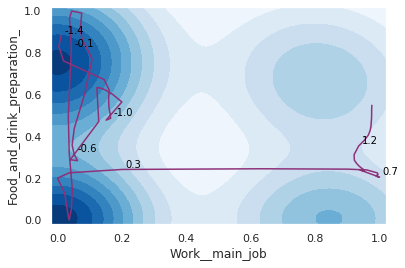

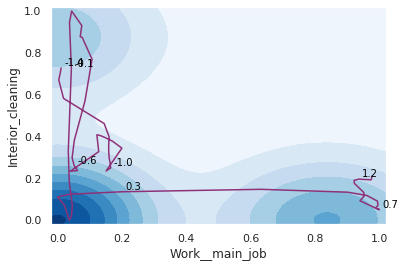

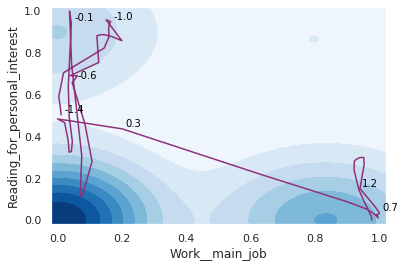

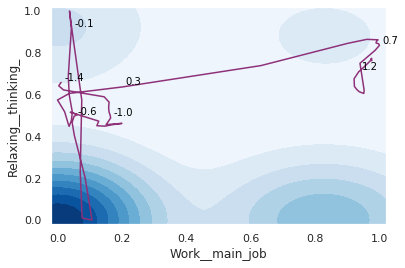

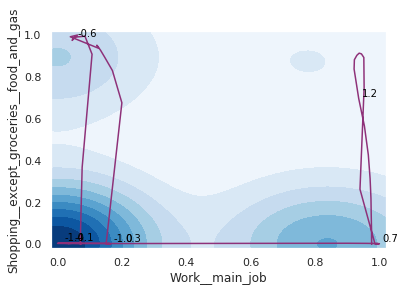

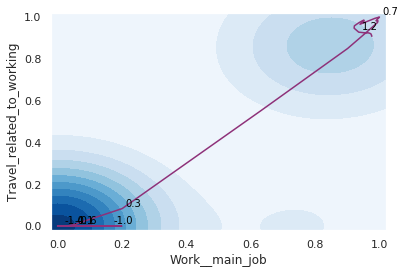

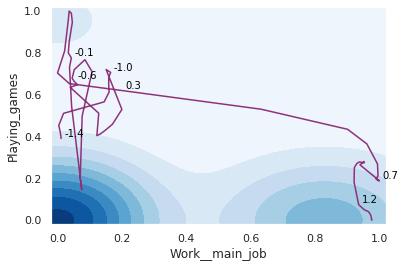

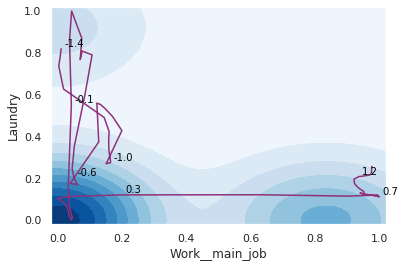

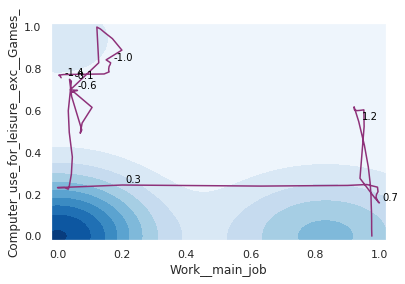

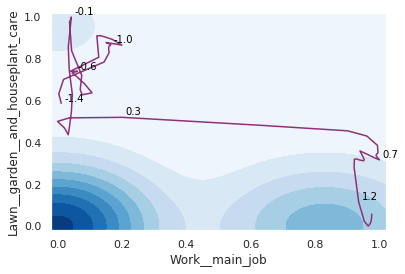

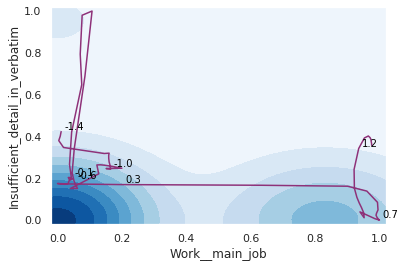

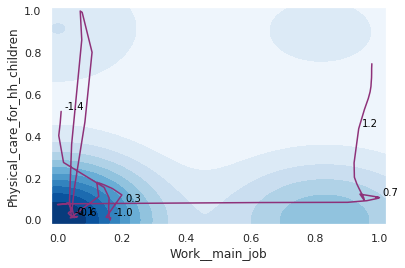

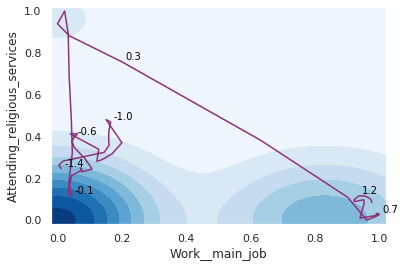

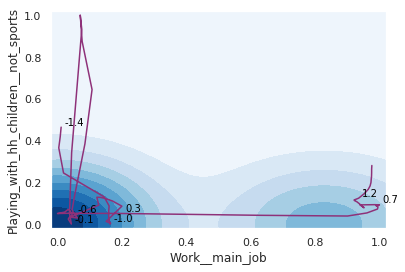

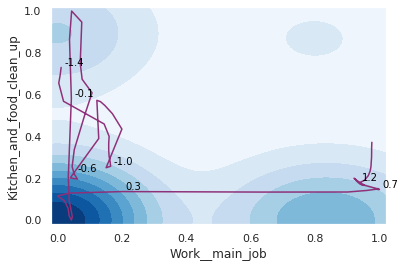

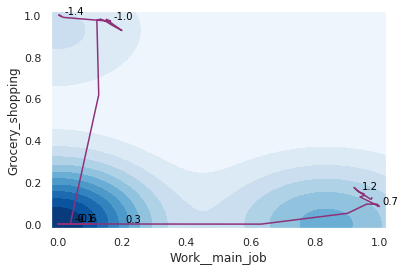

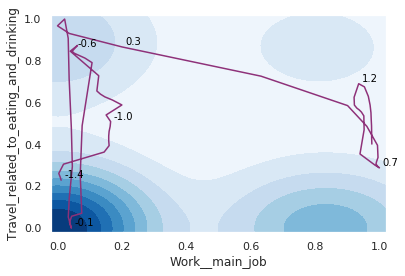

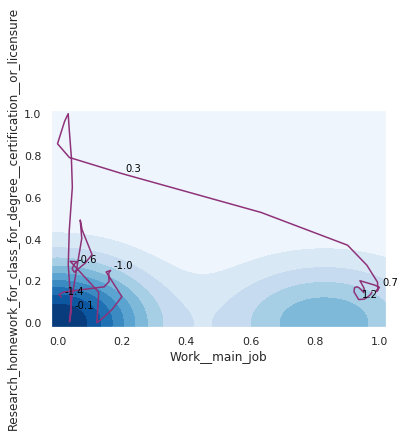

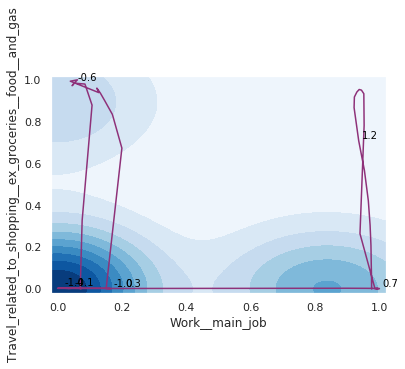

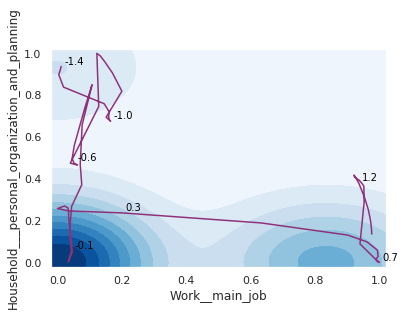

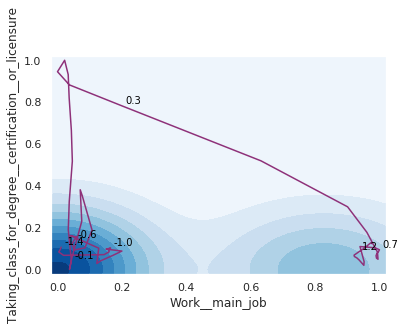

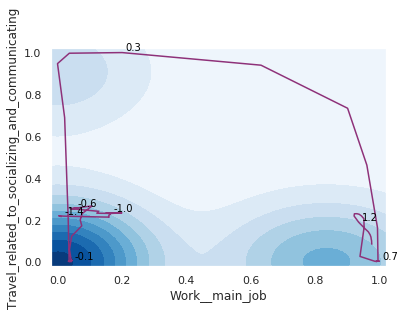

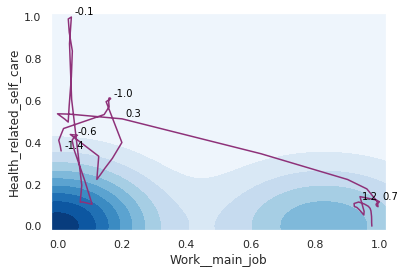

In [16]:
for field in filtered.columns[0:29]:
    
     encode_plot2d(vae.encoder,vae.decoder, qt, y_col=field)

In [17]:
filtered-qt

,Sleeping,Television_and_movies__not_religious_,Work__main_job,Eating_and_drinking,Socializing_and_communicating_with_others,Washing__dressing_and_grooming_oneself,Food_and_drink_preparation_,Interior_cleaning,Reading_for_personal_interest,Relaxing__thinking_,Shopping__except_groceries__food_and_gas,Travel_related_to_working,Playing_games,Laundry,Computer_use_for_leisure__exc__Games_,Lawn__garden__and_houseplant_care,Insufficient_detail_in_verbatim,Physical_care_for_hh_children,Attending_religious_services,Playing_with_hh_children__not_sports,Kitchen_and_food_clean_up,Grocery_shopping,Travel_related_to_eating_and_drinking,Research_homework_for_class_for_degree__certification__or_licensure,Travel_related_to_shopping__ex_groceries__food__and_gas,Household___personal_organization_and_planning,Taking_class_for_degree__certification__or_licensure,Travel_related_to_socializing_and_communicating,Health_related_self_care,Attending_or_hosting_parties_receptions_ceremonies,Work__other_job_s_,Gap_can_t_remember,Travel_related_to_caring_for___helping_hh_children,Sleeplessness,Travel_related_to_grocery_shopping,Walking,Care_for_animals_and_pets__not_veterinary_care_,Walking___exercising___playing_with_animals,Participation_in_religious_practices,Interior_arrangement__decoration____repairs,...,Travel_rel__to_socializing__relaxing____leisure__n_e_c__,Waiting_associated_w_banking_financial_services,Waiting_associated_w_admin__activities__education_,Travel_related_to_using_lawn_and_garden_services,Travel_related_to_nonhh_children_s_education,Waiting_associated_with_work_related_activities,Using_interior_cleaning_services_,Waiting_assoc__w_attending_hosting_social_events,Watching_rugby,Watching_skiing__ice_skating__snowboarding,Travel_related_to_personal_care__n_e_c__,Travel_related_to_education__n_e_c__,Travel_related_to_using_household_services__n_e_c__,Travel_related_to_work__n_e_c__,Travel_rel__to_religious_spiritual_activities__n_e_c__,Waiting_associated_w_purchasing_selling_real_estate,Waiting_associated_with_socializing__n_e_c__,Travel_related_to_consumer_purchases__n_e_c__,Security_procedures_related_to_work,Using_pet_services__n_e_c__,Telephone_calls_to_from_paid_child_or_adult_care_providers,Travel_related_to_using_legal_services,Lawn_and_garden__n_e_c___,Waiting_associated_with_research_homework,Waiting_associated_with_pet_services,Waiting_associated_with_other_income_generating_activities,Using_vehicle_maint____repair_svcs__n_e_c__,Housework__n_e_c___,Using_lawn_and_garden_services__n_e_c__,Security_procedures_rel__to_govt_svcs_civic_obligations__n_e_c__,Activities_related_to_nonhh_child_s_educ___n_e_c__,Waiting_associated_with_job_search_or_interview,Work_and_work_related_activities__n_e_c__,Government_services__n_e_c__,Public_health___safety_activities__n_e_c__,Travel_related_to_household_activities__n_e_c__,Travel_rel__to_govt_svcs___civic_obligations__n_e_c__,Food___drink_prep__presentation____clean_up__n_e_c___,Telephone_calls__n_e_c__,Public_health_activities
0,0.422012,0.052901,0.054411,0.127244,0.023262,-0.176874,0.106554,0.050331,0.331757,0.714431,0.004101,0.002772,0.973068,0.004316,0.241866,0.545865,0.080222,0.040720,0.366520,0.049733,0.005330,0.002057,0.470229,-0.307399,0.003368,0.144313,0.562352,0.006219,0.810623,0.605004,0.047538,0.266446,0.023885,0.970464,0.001455,0.778884,0.116686,0.348544,0.786412,0.137698,...,0.123655,0.005857,0.062438,0.108236,0.183827,0.004431,0.035874,0.022466,0.056864,0.0,0.045124,0.113784,0.030854,0.027289,0.085883,0.013165,0.083139,0.003131,0.014495,0.011092,0.027323,0.0,0.077431,0.007711,0.035806,0.0,0.008224,0.065787,0.099808,0.063671,0.038412,0.112065,0.017299,0.0,0.0,0.0,0.0,0.018960,0.074472,0.205721
1,0.097193,0.223941,0.017101,-0.081317,0.340390,-0.091418,-0.041037,-0.086817,-0.274644,0.799202,0.005113,0.001906,0.607732,0.746126,-0.433476,0.555231,0.161624,-0.545395,0.257589,-0.594445,-0.309444,0.040767,0.391592,0.129333,0.004379,-0.223266,0.091484,0.218839,0.450268,0.798662,0.074870,0.

In [0]:
pd.DataFrame(encoded_data).to_csv("encoded_data.csv", header=False, index=False)


In [0]:
vae.encoder.save_weights('encoder')

In [0]:
vae.decoder.save_weights('decoder')

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [28]:
!ls "/content/drive/My Drive/VAEs-in-Economics/Resources"

decoder.data-00000-of-00002
decoder.data-00001-of-00002
decoder.index
encoded_data.csv
encoder.data-00000-of-00002
encoder.data-00001-of-00002
encoder.index
EqualSizedBins.png
PaintedStones.png
type_plot.png
VAE.png
VAE.pptx
Work__main_job_Attending_religious_services.png
Work__main_job_Computer_use_for_leisure__exc__Games_.png
Work__main_job_Eating_and_drinking.png
Work__main_job_Food_and_drink_preparation_.png
Work__main_job_Grocery_shopping.png
Work__main_job_Health_related_self_care.png
Work__main_job_Household___personal_organization_and_planning.png
Work__main_job_Insufficient_detail_in_verbatim.png
Work__main_job_Interior_cleaning.png
Work__main_job_Kitchen_and_food_clean_up.png
Work__main_job_Laundry.png
Work__main_job_Lawn__garden__and_houseplant_care.png
Work__main_job_Physical_care_for_hh_children.png
Work__main_job_Playing_games.png
Work__main_job_Playing_with_hh_children__not_sports.png
Work__main_job_Reading_for_personal_interest.png
Work__main_job_Relaxing__thinking_.png

In [0]:
!cp *.png "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp *.csv "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp encoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp decoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"